In [1]:
from skimage import *
from matplotlib import pyplot as plt

import numpy as np
import h5py 

# Load the result data

In [2]:
training_result = "/home/wentao/project/keras_training/UNet2D1D_SSIM_loss_no_regularization/20190818-171741/predictions/result.h5"

In [3]:
f = h5py.File(training_result,'r') 
result = np.array(f.get('result'))
truth = np.array(f.get('truth'))
imag = np.array(f.get('input'))

## Calculate the metrics

In [4]:
psnr = []
mse = []
nrmse = []
ssim = []
for i in range(0, truth.shape[0]):
    psnr.append(measure.compare_psnr(result[i],truth[i], 1))
    mse.append(measure.compare_mse(result[i], truth[i]))
    nrmse.append(measure.compare_nrmse(result[i], truth[i]))
    ssim.append(measure.compare_ssim(result[i], truth[i], data_range=1))

# find the best and the worst images by ssim value  
best_image_index = ssim.index(max(ssim))
worst_image_index = ssim.index(min(ssim))

## Average mse, nrmse psnr, ssim values

In [5]:
print(np.mean(mse), np.mean(nrmse), np.mean(psnr), np.mean(ssim))

0.0025223640651640873 0.21133017439700152 26.821614944134954 0.8385503259409074


## Best image by ssim value

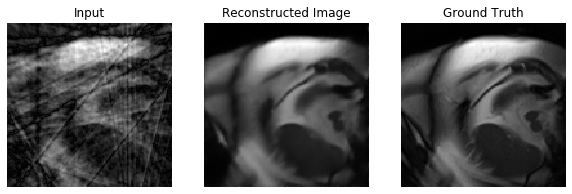

In [6]:
plt.figure(1, figsize=(10,10))

plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Input')
plt.imshow(imag[best_image_index, :, :, 0], cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Reconstructed Image')
plt.imshow(result[best_image_index, :, :, 0], cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Ground Truth')
plt.imshow(truth[best_image_index, :, :, 0], cmap='gray')

plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_best_ssim_{0:.4f}.jpg'.format(ssim[best_image_index]))

## SSIM value of the best image

In [7]:
ssim[best_image_index]

0.9387480976242589

## Worst image by ssim value

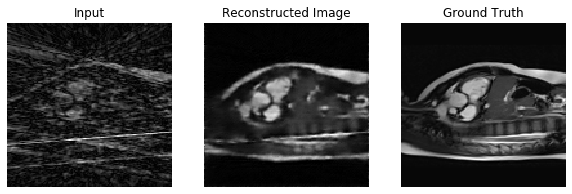

In [8]:
plt.figure(2, figsize=(10,10))

plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Input')
plt.imshow(imag[worst_image_index, :, :, 0], cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Reconstructed Image')
plt.imshow(result[worst_image_index, :, :, 0], cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Ground Truth')
plt.imshow(truth[worst_image_index, :, :, 0], cmap='gray')

plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_worst_ssim_{0:.4f}.jpg'.format(ssim[worst_image_index]))

## SSIM value of the worst image

In [9]:
ssim[worst_image_index]

0.6470876433887812

# Historgrams

In [10]:
figsize = (5, 5)

In [11]:
title = 'UNet2D1D SSIM Loss No Regularization'

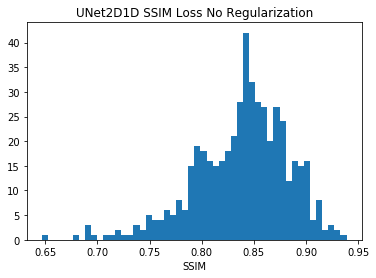

In [12]:
plt.figure(1)
plt.title(title)
plt.xlabel('SSIM')
plt.hist(ssim, bins=50)

plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_hist_SSIM.jpg')

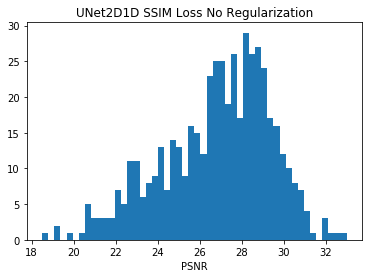

In [13]:
plt.figure(2)
plt.title(title)
plt.xlabel('PSNR')
plt.hist(psnr, bins=50)

plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_hist_PSNR.jpg')

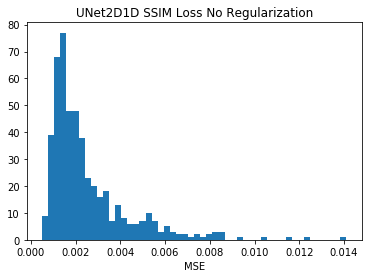

In [14]:
plt.figure(3)
plt.title(title)
plt.xlabel('MSE')
plt.hist(mse, bins=50)

plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_hist_MSE.jpg')

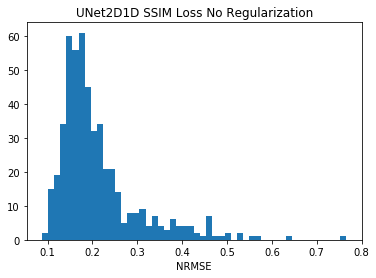

In [15]:
plt.figure(4)
plt.title(title)
plt.xlabel('NRMSE')
plt.hist(nrmse, bins=50)

plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_hist_NRMSE.jpg')